In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [1287]:
feature=pd.read_csv('feature.csv')
target=pd.read_csv('target.csv')

In [1288]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_retweet_count       8328 non-null   int64  
 1   total_favorite_count      8328 non-null   int64  
 2   total_hashtag_count       8328 non-null   int64  
 3   total_url_count           8328 non-null   int64  
 4   total_mentions_count      8328 non-null   int64  
 5   total_media_count         8328 non-null   int64  
 6   number_of_tweets_scraped  8328 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 455.6 KB


In [1289]:
targetSR=target['mbti_personality']

In [1290]:
for row in target.index:
    # ie 구분
    if 'i' in target.loc[row,'mbti_personality']:
        target.loc[row,'ie']='i'
    else: target.loc[row,'ie']='e'

    # ns 구분
    if 'n' in target.loc[row,'mbti_personality']:
        target.loc[row,'ns']='n'
    else: target.loc[row,'ns']='s'

    # ft 구분
    if 'f' in target.loc[row,'mbti_personality']:
        target.loc[row,'ft']='f'
    else: target.loc[row,'ft']='t'

    # jp구분
    if 'j' in target.loc[row,'mbti_personality']:
        target.loc[row,'jp']='j'
    else: target.loc[row,'jp']='p'

In [1291]:
#target.to_csv('target_2.csv',index=False)

In [1318]:
target.value_counts()

mbti_personality  ie  ns  ft  jp
infj              i   n   f   j     917
intj              i   n   t   j     905
enfp              e   n   f   p     900
infp              i   n   f   p     899
enfj              e   n   f   j     723
intp              i   n   t   p     712
entj              e   n   t   j     677
entp              e   n   t   p     586
isfj              i   s   f   j     420
istj              i   s   t   j     342
esfj              e   s   f   j     236
isfp              i   s   f   p     232
estj              e   s   t   j     221
istp              i   s   t   p     209
esfp              e   s   f   p     202
estp              e   s   t   p     147
Name: count, dtype: int64

## 데이터 확인

In [1292]:
target_ie=target['ie']
target_ns=target['ns']
target_ft=target['ft']
target_jp=target['jp']

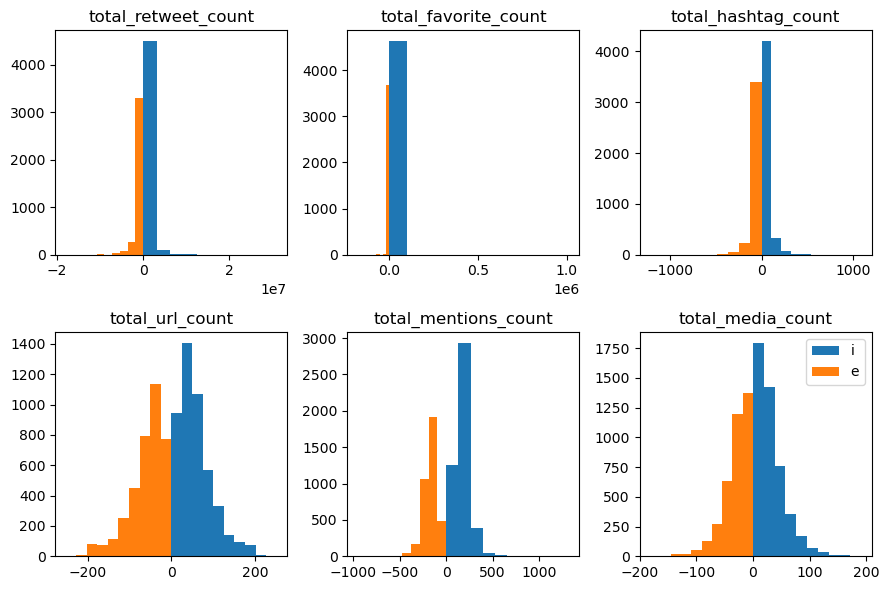

In [1293]:
i_feature=feature[target_ie=='i']
e_feature=feature[target_ie=='e']
fig,ax=plt.subplots(figsize=(9,6),ncols=3,nrows=2)
for i in range(6):
    ax[i//3,i%3].hist(i_feature[feature.columns[i]],label='i')
    ax[i//3,i%3].hist(-e_feature[feature.columns[i]],label='e')
    ax[i//3,i%3].set(title=feature.columns[i])
plt.tight_layout()
plt.legend()

## 데이터셋 분리

In [1294]:
from sklearn.model_selection import train_test_split, cross_validate

In [1295]:
X_train,X_test,y_train,y_test=train_test_split(feature,targetSR,stratify=targetSR,random_state=38)

In [1296]:
y_train.value_counts()

mbti_personality
infj    688
intj    679
enfp    675
infp    674
enfj    542
intp    534
entj    508
entp    439
isfj    315
istj    256
esfj    177
isfp    174
estj    166
istp    157
esfp    152
estp    110
Name: count, dtype: int64

## 스케일링

In [1297]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [1298]:
minmax=MinMaxScaler()
standard=StandardScaler()

In [1299]:
minmax.fit(X_train)
X_train_minmax=minmax.transform(X_train)
X_test_minmax=minmax.transform(X_test)

standard.fit(X_train)
X_train_standard=standard.transform(X_train)
X_test_standard=standard.transform(X_test)

## 학습

In [1300]:
from sklearn.ensemble import RandomForestClassifier

In [1301]:
model=RandomForestClassifier(random_state=38)

In [1302]:
model.fit(X_train,y_train)
print(f'train score : {model.score(X_train,y_train)}')
print(f'test score : {model.score(X_test,y_test)}')

train score : 0.9996797950688441
test score : 0.12055715658021134


In [1303]:
model.fit(X_train_minmax,y_train)
print(f'minmax train score : {model.score(X_train_minmax,y_train)}')
print(f'minmax test score : {model.score(X_test_minmax,y_test)}')

minmax train score : 0.9996797950688441
minmax test score : 0.12151777137367915


In [1304]:
model.fit(X_train_standard,y_train)
print(f'standard train score : {model.score(X_train_standard,y_train)}')
print(f'standard test score : {model.score(X_test_standard,y_test)}')

standard train score : 0.9996797950688441
standard test score : 0.12055715658021134


In [1319]:
1/16

0.0625

## 튜닝

In [1305]:
from sklearn.model_selection import RandomizedSearchCV

# RandomForestClassfier 하이퍼 파라미터 설정
params={'max_depth':range(5,20),'min_samples_leaf':range(20,30)}

searchCV=RandomizedSearchCV(model,
                            param_distributions=params,
                            verbose=4)

searchCV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..max_depth=5, min_samples_leaf=27;, score=0.150 total time=   0.4s
[CV 2/5] END ..max_depth=5, min_samples_leaf=27;, score=0.139 total time=   0.4s
[CV 3/5] END ..max_depth=5, min_samples_leaf=27;, score=0.147 total time=   0.4s
[CV 4/5] END ..max_depth=5, min_samples_leaf=27;, score=0.119 total time=   0.4s
[CV 5/5] END ..max_depth=5, min_samples_leaf=27;, score=0.117 total time=   0.4s
[CV 1/5] END ..max_depth=7, min_samples_leaf=24;, score=0.148 total time=   0.5s
[CV 2/5] END ..max_depth=7, min_samples_leaf=24;, score=0.147 total time=   0.6s
[CV 3/5] END ..max_depth=7, min_samples_leaf=24;, score=0.153 total time=   0.5s
[CV 4/5] END ..max_depth=7, min_samples_leaf=24;, score=0.126 total time=   0.5s
[CV 5/5] END ..max_depth=7, min_samples_leaf=24;, score=0.112 total time=   0.5s
[CV 1/5] END ..max_depth=6, min_samples_leaf=23;, score=0.152 total time=   0.5s
[CV 2/5] END ..max_depth=6, min_samples_leaf=23;

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=38),
                   param_distributions={'max_depth': range(5, 20),
                                        'min_samples_leaf': range(20, 30)},
                   verbose=4)

In [1306]:
print(f'max depth {searchCV.best_estimator_.max_depth}')
print(f'min_samples_leaf {searchCV.best_estimator_.min_samples_leaf}')

max depth 19
min_samples_leaf 24


In [1307]:
searchCV.best_estimator_.score(X_train,y_train)

0.36567403138008325

In [1308]:
searchCV.best_estimator_.score(X_test,y_test)

0.14457252641690682

## 성능지표

In [1313]:
aa=pd.read_csv('user_info.csv')
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            8328 non-null   int64  
 1   id_str                        8328 non-null   int64  
 2   name                          8327 non-null   object 
 3   screen_name                   8328 non-null   object 
 4   location                      7129 non-null   object 
 5   description                   8209 non-null   object 
 6   verified                      8328 non-null   bool   
 7   followers_count               8328 non-null   int64  
 8   friends_count                 8328 non-null   int64  
 9   listed_count                  8328 non-null   int64  
 10  favourites_count              8328 non-null   int64  
 11  statuses_count                8328 non-null   int64  
 12  number_of_quoted_statuses     8328 non-null   int64  
 13  num

In [1314]:
aa=pd.read_csv('mbti_labels.csv')

In [1315]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                8328 non-null   int64 
 1   mbti_personality  8328 non-null   object
dtypes: int64(1), object(1)
memory usage: 130.2+ KB


In [12]:
import koreanize_matplotlib

Text(0, 0.5, 'score')

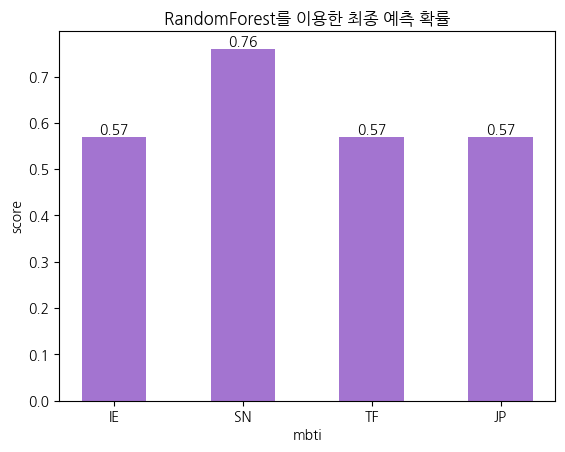

In [14]:
bar=plt.bar(['IE','SN','TF','JP'],[0.57,0.76,0.57,0.57],color='#A374D0',width=0.5)
plt.bar_label(container=bar)
plt.title('RandomForest를 이용한 최종 예측 확률')
plt.xlabel('mbti')
plt.ylabel('score')

In [16]:
prob=[[0.57,0.76,0.57,0.57],[0.56,0.75,0.56,0.54],[0.56,0.75,0.55,0.54],[0.55,0.75,0.53,0.52]]
model_name=['RandomForest','DecisionTree','SurportVector','Voting']

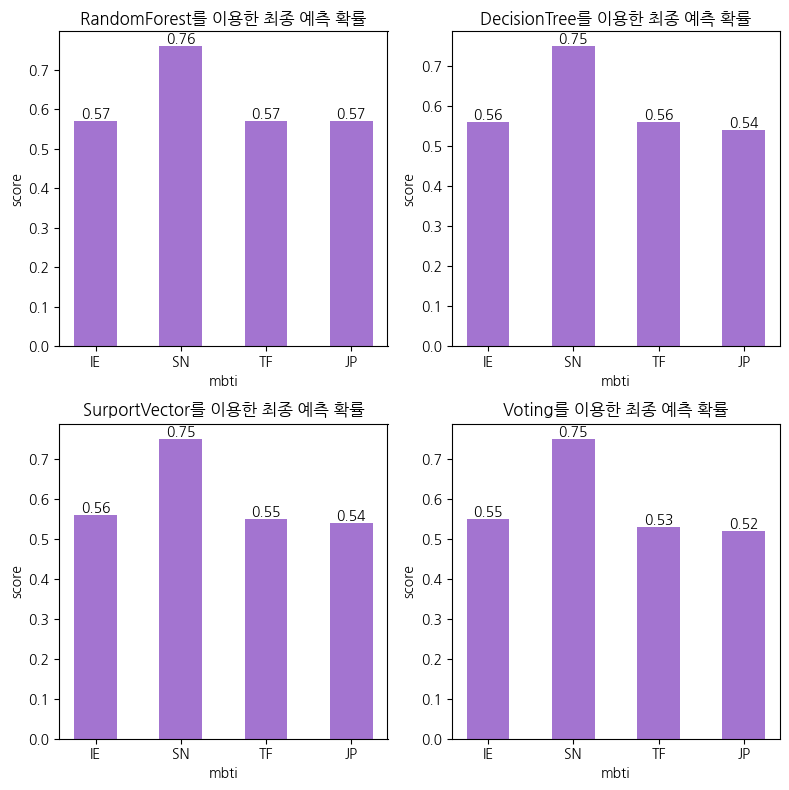

In [22]:
fig,ax=plt.subplots(figsize=(8,8),ncols=2,nrows=2)
for i in range(4):
    bar=ax[i//2,i%2].bar(['IE','SN','TF','JP'],prob[i],color='#A374D0',width=0.5)
    ax[i//2,i%2].bar_label(container=bar)
    ax[i//2,i%2].set_title(f'{model_name[i]}를 이용한 최종 예측 확률')
    ax[i//2,i%2].set_xlabel('mbti')
    ax[i//2,i%2].set_ylabel('score')
plt.tight_layout()
plt.show()